# Project 3 - PINN ...
## Diffusion equation for $u = u(x,t)$
Solving $$\partial_{t}u(x,t) - \partial_{xx}u(x,t) = f(x,t) $$

#### Program imports and defaults

In [1]:
from network import *
from PDEq import *
from support import *

import autograd.numpy as anp
from autograd import elementwise_grad

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

## Random seed
default_seed = 15; anp.random.seed(default_seed)

## Figure defaults
plt.rcParams["figure.figsize"] = (8,3); plt.rcParams["font.size"] = 10

#### Problem statement and domain initialization

In [2]:
Nx,Nt = 10,10

x = anp.linspace(0,1,Nx)
t = anp.linspace(0,1,Nt)
domain_array = anp.array([x,t])

## Setting the PDE to solve for. This 
PDE = Diffusion1D(0)
f = 0

If $u = u(\boldsymbol{x},t)$, then the problem dimension is $d = \text{dim}(\boldsymbol{x}) + 1$, where $+1$ is because of the temporal variable. For $\boldsymbol{x} = (x,y)$, then $\text{dim}(\boldsymbol{x}) = 2$. 

#### Network setup

In [3]:
anp.random.seed(default_seed)

layer_out_sizes = [200,50,1]

hidden_func = sigmoid #ReLU #sigmoid ReLU, ELU, LeakyReLU,identity
hidden_der  = elementwise_grad(hidden_func,0)

act_funcs = []; act_ders = []
for i in range(len(layer_out_sizes)-1):
    act_funcs.append(hidden_func)
    act_ders.append(hidden_der)
act_funcs.append(identity); 
output_der = identity #elementwise_grad(act_funcs[-1],0);
act_ders.append(output_der)

network = FFNNetwork(layer_out_sizes,act_funcs,act_ders,PDE,f,domain_array=domain_array)

#### Solving the system by network training

In [4]:
epoch = 250
P = network.train_network(learn_rate=0.01,epochs=epoch)

Initial cost: 11.5143
Final cost: 2.386431594101517


#### Evaluation and plotting

Max. abs.difference: 0.28867204969384946


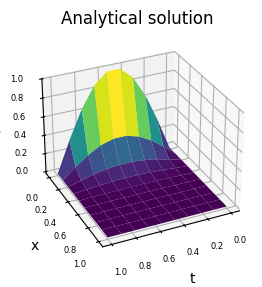

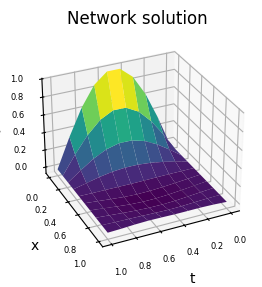

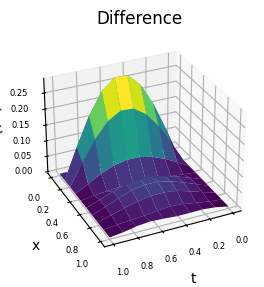

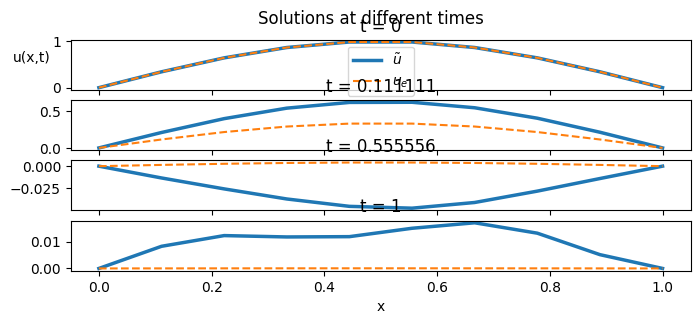

In [7]:
network.evaluate()
print('Max. abs.difference:',anp.max(network.abs_diff))

network.plot_result()
plt.show()

1.0


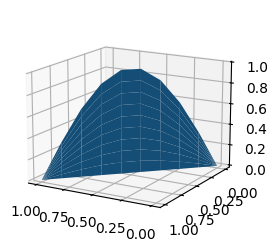

In [8]:

xx,tt = anp.meshgrid(x,t)
print(x[-1])
g_t = h1 = (1 - tt) * (PDE.init_function(xx) - ((1 - xx/x[-1])*PDE.init_function(x[0])) +
                                                      (xx/x[-1])*PDE.init_function(x[-1]))
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(t,x,g_t)
ax.view_init(elev=15, azim=120)